## Домашнее задание к лекции «Задачи классификации и кластеризации»

Текст задания также доступен тут http://prntscr.com/umci7o

#### Задание.

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
print("Feature names:")
print(iris.feature_names)

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
X = iris.data[:, [0, 1]]

In [6]:
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal length (cm)', 'petal width (cm)'])
df['variety'] = iris.target
df.drop(['petal length (cm)', 'petal width (cm)'], axis=1, inplace=True)

df.head()

,sepal_length,sepal_width,variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


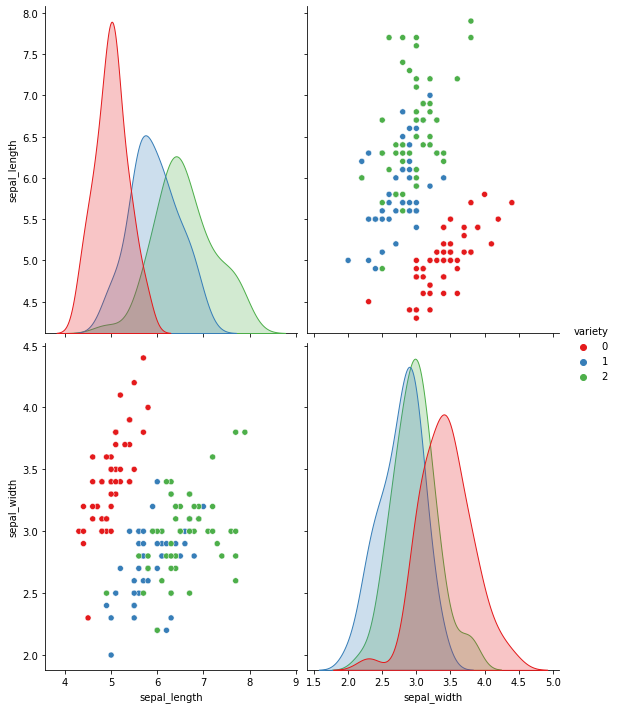

In [7]:
#  Визуализируем данные
sns.pairplot(df, hue='variety', palette='Set1', height=5, aspect=.8,)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

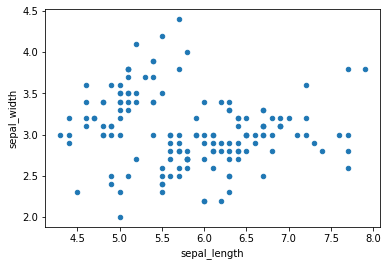

In [8]:
# Корреляция
df.plot(kind='scatter', x='sepal_length', y='sepal_width')

In [9]:
df[['sepal_length', 'sepal_width', 'variety']].corr()

,sepal_length,sepal_width,variety
sepal_length,1.000000,-0.117570,0.782561
sepal_width,-0.117570,1.000000,-0.426658
variety,0.782561,-0.426658,1.000000


In [10]:
X = df[['sepal_length', 'sepal_width']]
y = iris.target

In [11]:
# разделяем выборку на тренировочную и тестовую

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [12]:
# импортируем LDA-функционал

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [14]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=2)

In [15]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0])

In [16]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,1,1
2,1,2
3,0,0
4,1,2
5,0,0
6,0,0
7,1,1
8,2,2
9,1,1


In [17]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, lda.predict(X_test))

0.7368421052631579

In [19]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.76693126,  7.21602937],
       [ 1.74205722, -3.70920618],
       [ 4.51177118, -4.27705696]])

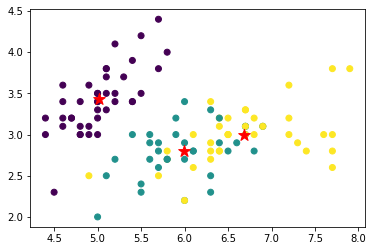

In [41]:
# Визуализируем предсказание для тестовой выборки и центры классов 
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [25]:
from sklearn.cluster import KMeans

In [28]:
# строим график локтя

k_inertia = []

ks = range(1, 8)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df)
    k_inertia.append(clf_kmeans.inertia_)

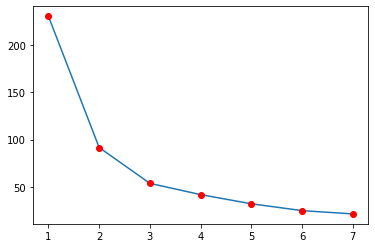

In [29]:
# По графику локтя видно, что оптимальным будет разбъбиение на 2 или 3 кластера
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

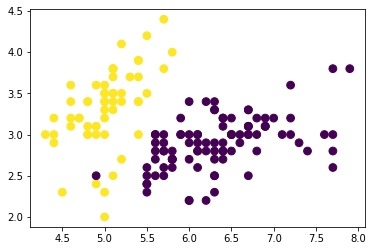

In [39]:
# 2 кластера

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(df)
plt.scatter(df['sepal_length'], df['sepal_width'], c=clusters, s=60)

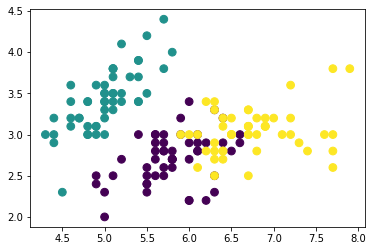

In [40]:
# 3 кластера

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df)
plt.scatter(df['sepal_length'], df['sepal_width'], c=clusters, s=60)